In [1]:
import sys
import cPickle

import numpy as np
import sys
sys.path.append('../../')
sys.path.append('../../pyfos/')
from pyfos.models.simplified_var_feedforward import build_simplified_var_feedforward
from pyfos.models.feedforward import build_feedforward
from pyfos.generic.optimizer import gd_optimizer
from pyfos.generic.regularizers import gaus_prior
from functools import partial 
from pyfos.tc.simple import  simple_tc
from pyfos.tc.cv import  cv_tc
from pyfos.hyperoptimizers.random_search import random_optimize
from pyfos.hyperoptimizers.no_optimize import no_optimize
import theano
%matplotlib inline
import matplotlib.pylab as plt
import random
import theano.tensor as T
import time
import os 

import cPickle

X_train = np.load('../../../data/mnist_train_x.npy').astype(theano.config.floatX)
Y_train = np.load('../../../data/mnist_train_y.npy')

X_test = np.load('../../../data/mnist_test_x.npy').astype(theano.config.floatX)
Y_test = np.load('../../../data/mnist_test_y.npy')

param_num = X_test.shape[1] * 300 + 300*10 + 300 + 10 

lr = theano.shared(np.array(10**(-5)).astype(theano.config.floatX))


/usr/local/lib/python2.7/dist-packages/theano/configdefaults.py:1818: UserWarning: Theano does not recognise this flag: devic
  warnings.warn('Theano does not recognise this flag: {0}'.format(key))


In [2]:
alphas = theano.shared(np.array([1.0]* param_num).astype(theano.config.floatX))

optimizer = partial(gd_optimizer, learning_rate=lr)

inits = [np.sqrt(2.0/(X_train.shape[1] )).astype(theano.config.floatX), np.sqrt(2.0/(300 )).astype(theano.config.floatX)]
model_build = partial(build_simplified_var_feedforward,  param_pool_size=25, megabatch_size=100, use_softmax=True,  structure = [X_train.shape[1],300, 10],   init_sigmas=inits,         
nonlinearity=lambda x:T.nnet.relu(x), log_alphas=alphas, bias=True)


In [3]:
with open('./acc2_results_var_random.pckl', 'rb') as inp:

    random = cPickle.load(inp)
    
with open('./acc2_results_var_mad.pckl', 'rb') as inp:
    mad = cPickle.load(inp)
    
with open('./acc2_results_var_greed.pckl', 'rb') as inp:
    greed = cPickle.load(inp)
    
with open('./acc2_results_var_hoag.pckl', 'rb') as inp:
    hoag = cPickle.load(inp)

In [4]:

tc = simple_tc(model_build, optimizer, X_train, Y_train,batch_size=100)
X = T.matrix()

predict = theano.function([X], tc.models[0].predict_var(X),allow_input_downcast=True)


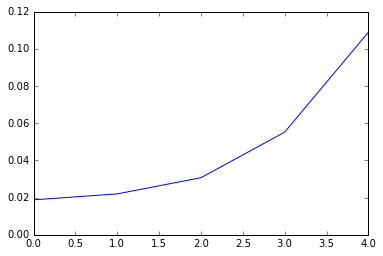

In [33]:
plt.plot(X)

DrMAD
DrMAD [ 0.981196  0.98062   0.979072  0.975632  0.968932  0.958308  0.94228
  0.918152  0.888256  0.852756  0.813592]
Random search
Random search [ 0.9816   0.98084  0.97922  0.97512  0.96934  0.9588   0.94162  0.91862
  0.88674  0.8523   0.81358]
Greedy
Greedy [ 0.97688  0.97608  0.9757   0.9722   0.96888  0.96328  0.95472  0.94214
  0.92602  0.90676  0.88446]
HOAG
HOAG [ 0.98104  0.98028  0.97802  0.97454  0.96876  0.95754  0.94188  0.92216
  0.89204  0.85622  0.8214 ]


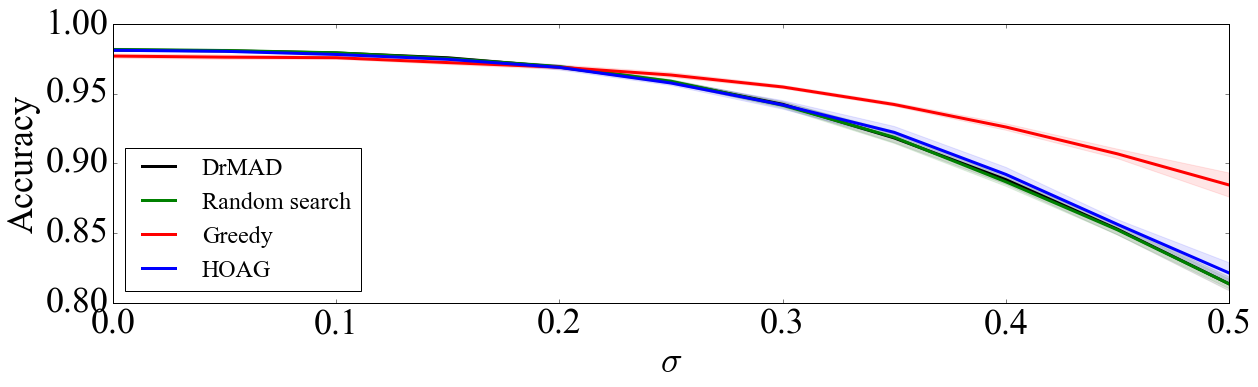

In [5]:


id = -1
font = {'family': 'Times New Roman',
        'weight': 'normal',
       'size':36}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)



for dataset, label, c in [(mad, 'DrMAD', 'k'), 
                         (random, u'Random search', 'g'),
                         (greed, u'Greedy', 'r'),
                         (hoag, 'HOAG', 'b')
                          ]:
    
    
    id+=1
    X = [[] for _ in xrange(0, 51, 5)]
    print label
    
    for m in dataset:
            
            
            tc.models[0].params.set_value(np.array(m[-1]))

            for i in xrange(0, 11):


                X[i].append(1.0- np.mean(np.not_equal( predict(X_test + np.random.randn(*X_test.shape)*i*0.05), Y_test)))
    print label, np.mean(X, axis=1)
            
            
    plt.plot(np.arange(0, 0.51, 0.05), np.mean(X, axis=1), c= c, label=label, lw=3)
    plt.fill_between(np.arange(0, 0.51, 0.05), np.mean(X, axis=1) - np.std(X, axis=1), np.mean(X, axis=1) + np.std(X, axis=1),
                   alpha=0.1, color=c)

plt.legend(loc='best', fontsize=24)
plt.xlabel(u'$\sigma$', fontsize=36)
plt.ylabel(u'Accuracy', fontsize=36)
plt.savefig('../../../doc/plots/noise.pdf', bbox_inches='tight')

In [2]:
import numpy as np
np.std(np.random.randn(100)*0.5)

0.47574201182161285

Random search


NameError: name 'tc' is not defined

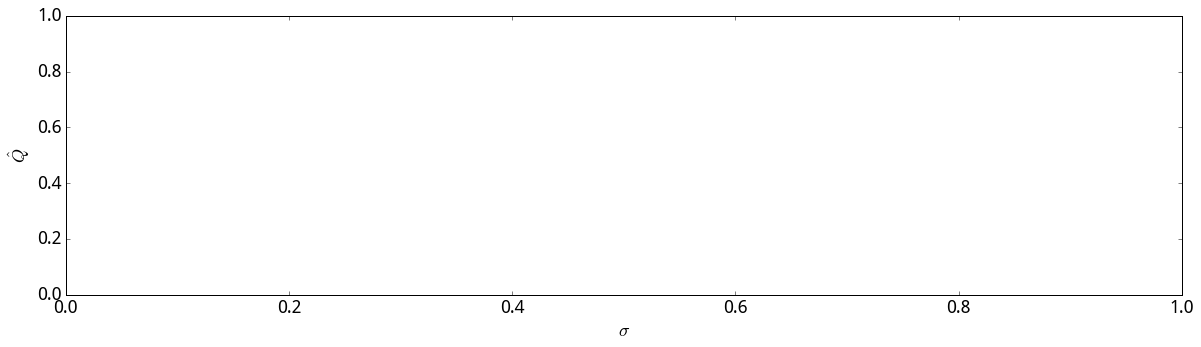

In [2]:
"""
with open('./acc2_results_cv_rand.pckl', 'rb') as inp:

    random = cPickle.load(inp)
  
with open('./acc2_results_cv_mad.pckl', 'rb') as inp:
    mad = cPickle.load(inp)


with open('./acc2_results_cv_greed.pckl', 'rb') as inp:
    greed = cPickle.load(inp)
    
with open('./acc2_results_cv_hoag.pckl', 'rb') as inp:
    hoag = cPickle.load(inp)
"""
id = -1
font = {'family': 'Droid Sans',
        'weight': 'normal',
       'size':18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (20, 5)
plt.xlabel(u'$\sigma$', fontsize=18)
plt.ylabel(u'$\hat{Q}$', fontsize=18)


for dataset, label, c in [#(mad, 'DrMAD', 'k'), 
                         (random, u'Random search', 'g'),
                         #(greed, u'Greedy', 'r'),
                         #(hoag, 'HOAG', 'b')
                          ]:
    id+=1
    X = [[] for _ in xrange(0, 3)]
    print label
    
    for m in dataset:
            
            
            tc.models[0].params.set_value(np.array(m[-1]))

            for i in range(3):
                

                X[i].append(1.0- np.mean(np.not_equal( predict(X_test + np.random.randn(*X_test.shape)*i*0.25), Y_test)))
    print label, np.mean(X, axis=1)
            

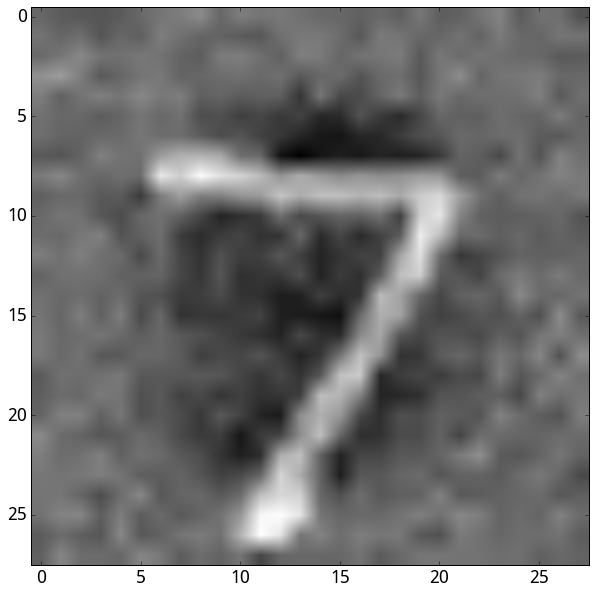

In [26]:
plt.imshow(X_test[0].reshape(28,28) + np.random.randn(28,28)*0.1, cmap='gray')

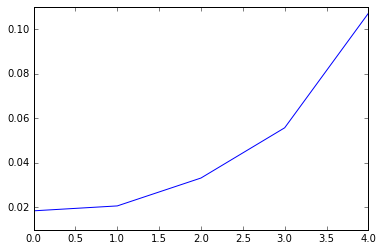

In [12]:
plt.plot(X0)

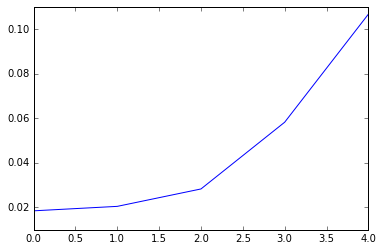

In [9]:
plt.plot(X0)

In [5]:

alphas.set_value(data.history[0][0][0])


import pyfos.models.simplified_var_feedforward
reload(pyfos.models.simplified_var_feedforward)
build_simplified_var_feedforward = pyfos.models.simplified_var_feedforward.build_simplified_var_feedforward
model_build = partial(build_simplified_var_feedforward,  param_pool_size=25, megabatch_size=100, use_softmax=True,  structure = [X_train.shape[1],300, 10],   init_sigmas=inits,         
nonlinearity=lambda x:T.nnet.relu(x), log_alphas=alphas, bias=True)

tc = simple_tc(model_build, optimizer, X_train, Y_train,batch_size=100)
X = T.matrix()

predict = theano.function([X], tc.models[0].predict_var(X))


In [77]:
print 'start!'
X1 = []
X2 = []
for i in xrange(12500):

    res = tc.do_train()
    if i%500 == 0:
       print res
print tc.do_validation()

start!
-234832.312586
-44210.7106119
-30064.1578224
-23442.6271399
-25592.0076981
-16101.9218038
-22990.3157772
-21647.2900207
-20058.9212857
-14068.1111385
-20760.9201213
-14232.0345986
-16542.1317251
-19316.7148966
-14901.7298329
-23764.1464293
-18333.3653496
-15932.8236551
-17478.8241587
-16579.3509657
-14791.2743266
-10844.5110699
-17344.2141236
-14908.5047898
-11745.9915974
-16008.0659307


In [79]:
#p0 = tc.models[0].params.eval()
#p1 = tc.models[0].params.eval()

In [94]:
X0 = []
tc.models[0].params.set_value(p0)
for i in xrange(0, 100):
    print i
    X0.append(np.mean(np.not_equal(predict(X_test+np.random.randn(*X_test.shape)*i*1.0/100), Y_test)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


KeyboardInterrupt: 

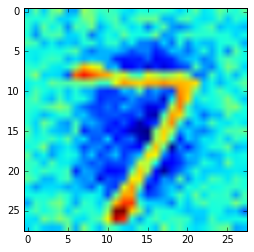

In [107]:
plt.imshow((X_test[0].reshape(28,28)+np.random.randn(28,28)*0.1))

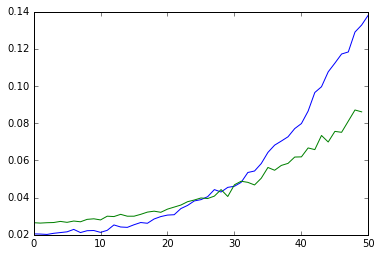

In [98]:
plt.plot(X0)
plt.plot(X1)

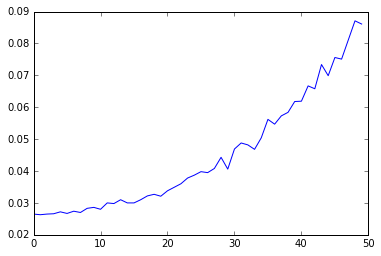

In [97]:
plt.plot(X1)

In [96]:
X1 = []
tc.models[0].params.set_value(p1)
for i in xrange(0, 50):
    print i
    X1.append(np.mean(np.not_equal(predict(X_test+np.random.randn(*X_test.shape)*i*1.0/100), Y_test)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


0.035299999999999998

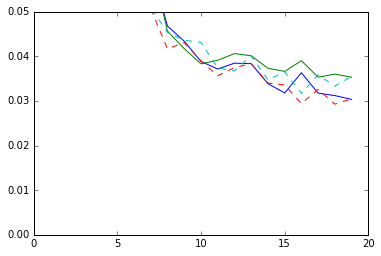

In [64]:
plt.plot(X1)
plt.plot(X2)

plt.plot(X1_, ls='--')
plt.plot(X2_, ls='--')

plt.ylim((0, 0.05))
X2[-1]
#X1_ = X1[:]
#X2_ = X2[:]

In [55]:
p = tc.models[0].params.eval()[param_num:]
print p.min(), p.max(), p.mean()

-2.31855479769 -1.85740671946 -2.00218029291


(0.0, 0.065)

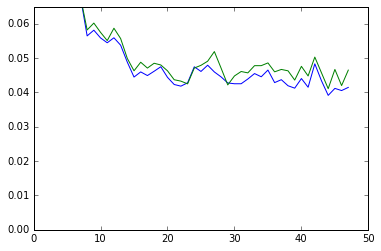

In [41]:
plt.plot(X1)
plt.plot(X2)
X2[-1]
plt.ylim((0.0, 0.065))

In [76]:

#alphas.set_value(data.history[-1][0][0])
#tc = simple_tc(model_build, optimizer, X_train, Y_train,batch_size=100)
#X = T.matrix()

#predict = theano.function([X], tc.models[0].predict_var(X))
alphas.set_value(data.history[-1][0][0])
#alphas.set_value(np.array([-2]*param_num).astype(np.float32))
tc.models[0].respawn()

#tc.models[0].params.set_value(np.array(tc.models[0].params.eval()[:param_num].tolist() + [-1]*param_num ).astype(theano.config.floatX))

In [15]:

print 'start!'
for i in xrange(12500):

    res = tc.do_train()
    if i%500 == 0:
        print i,  res
print tc.do_validation()

start!
0 -228241.945259


KeyboardInterrupt: 

In [ ]:
numpy = np
def gau_kl(pm, pv, qm, qv):
    """
    Kullback-Liebler divergence from Gaussian pm,pv to Gaussian qm,qv.
    Also computes KL divergence from a single Gaussian pm,pv to a set
    of Gaussians qm,qv.
    Diagonal covariances are assumed.  Divergence is expressed in nats.
    """
    if (len(qm.shape) == 2):
        axis = 1
    else:
        axis = 0
    # Determinants of diagonal covariances pv, qv
    dpv = pv.prod()
    dqv = qv.prod(axis)
    
    # Inverse of diagonal covariance qv
    iqv = 1./qv
    # Difference between means pm, qm
    diff = qm - pm
    return (0.5 *
            (numpy.log(dqv / dpv)            # log |\Sigma_q| / |\Sigma_p|
             + (iqv * pv).sum(axis)          # + tr(\Sigma_q^{-1} * \Sigma_p)
             + (diff * iqv * diff).sum(axis) # + (\mu_q-\mu_p)^T\Sigma_q^{-1}(\mu_q-\mu_p)
             - len(pm))) 

In [ ]:
sigma1 = 2*tc.models[0].params.eval()[param_num:]
m1 =tc.models[0].params.eval()[:param_num]
sigma0 = (2*alphas.eval())
m0 = np.zeros(param_num)
sigma1, sigma0 = sigma0, sigma1
m1,m0 = m0,m1
sigma1 = np.exp(sigma1)
sigma0 = np.exp(sigma0)
part1 = np.sum(sigma0/sigma1)
part2 = np.dot((m0-m1)/sigma1, (m0-m1))
part3 = -param_num
part4 = np.sum(np.log(sigma1)) - np.sum(np.log(sigma0))
part1, part2, part3,part4
print (part1+part2+part3+part4)/2


In [ ]:
from pyfos.generic.regularizers import KLD
KLD(m0, m1, (sigma0), (sigma1)).eval()

In [ ]:
params = tc.models[0].params.eval()
for i in xrange(0, 10):
    tc.models[0].params.set_value(params+np.random.randn(params.shape[0])*i*1.0/100)
    print np.mean(np.not_equal(predict(X_test), Y_test))